In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
path ='/content/drive/MyDrive/cod/LEA3_FIN2/data'
os.chdir(path) ## volver la carpeta de repositorio directorio de trabajo
sys.path.append(path) ## agregarla al path, para leer archivos propios como paquetes

In [3]:
# LIBRERIAS
import numpy as np
import pandas as pd
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
## import a_funciones as fn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ruta_1 = 'https://raw.githubusercontent.com/JonathanVillegasG/LEA3_FIN2/refs/heads/main/data/datos_nuevos_creditos.csv'
nuevos = pd.read_csv(ruta_1, sep = ',')

In [5]:
nuevos.info()
nuevos.describe()
nuevos.isnull().sum()
nuevos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1058 non-null   int64  
 1   CreditScore                      1058 non-null   int64  
 2   DebtRatio                        1058 non-null   float64
 3   Assets                           1058 non-null   int64  
 4   Age                              1058 non-null   int64  
 5   NumberOfDependents               1058 non-null   int64  
 6   NumberOfOpenCreditLinesAndLoans  1058 non-null   int64  
 7   MonthlyIncome                    1058 non-null   int64  
 8   NumberOfTimesPastDue             1058 non-null   int64  
 9   EmploymentLength                 1058 non-null   int64  
 10  HomeOwnership                    1058 non-null   object 
 11  Education                        1058 non-null   object 
 12  MaritalStatus       

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0


In [6]:
ruta_2 = 'https://raw.githubusercontent.com/JonathanVillegasG/LEA3_FIN2/refs/heads/main/data/datos_historicos.csv'
historicos = pd.read_csv(ruta_2, sep = ',')

In [7]:
historicos.info()
historicos.describe()
historicos.isnull().sum()
historicos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  object 
 11  Education                        10000 non-null  object 
 12  MaritalStatus      

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376


# estandarizar variables, y dummizar otras

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
categorical_vars = historicos.select_dtypes(include=['object', 'category']).columns.tolist()

historicos_dummies = pd.get_dummies(historicos[categorical_vars], columns=categorical_vars, drop_first=False)

# Ver las primeras filas para verificar la transformación
historicos_dummies.head()

,HomeOwnership_Mortgage,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,True,False,False,True,False,False,False,True,False,False,False
1,False,False,True,True,False,False,False,False,True,False,False
2,False,False,True,True,False,False,False,False,False,True,False
3,False,True,False,False,True,False,False,False,False,False,True
4,False,True,False,False,False,False,True,False,True,False,False


In [10]:
from sklearn.preprocessing import StandardScaler

# Lista de variables numéricas
numeric_vars = historicos.select_dtypes(include=['int64', 'float64']).drop(columns =['NoPaidPerc', 'ID']).columns.tolist()

# Escalar variables numéricas
scaler = StandardScaler()
historicos_Scaled = pd.DataFrame(scaler.fit_transform(historicos[numeric_vars]), columns=numeric_vars)

In [11]:
historicos_final = pd.concat([historicos_Scaled, historicos_dummies], axis=1)

In [12]:
historicos_final.head()


,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,-1.216297,-1.678443,-1.384470,-1.608507,-1.573613,-1.300925,1.267823,-0.084786,1.552206,0.410933,...,False,False,True,False,False,False,True,False,False,False
1,-0.387213,-1.253694,-1.674010,-0.349417,0.173487,-0.253608,-0.600388,0.608899,-1.690920,-0.622399,...,False,True,True,False,False,False,False,True,False,False
2,0.379062,-0.377126,0.320526,1.297085,0.173487,-0.428161,-1.566609,-0.605049,1.204729,-0.622399,...,False,True,True,False,False,False,False,False,True,False
3,-1.348197,-0.125706,-1.353805,0.037995,1.571167,-1.650030,1.631923,-0.778471,0.857251,-1.311286,...,True,False,False,True,False,False,False,False,False,True
4,1.421699,0.017781,-1.373459,0.909673,-1.224193,0.095498,-0.462199,1.476006,0.509773,-1.081657,...,True,False,False,False,False,True,False,True,False,False


# Clustering

In [ ]:
# Selección y escalado
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(random_state=42)
clusters = kmeans.fit_predict(historicos_final)

# Añade la etiqueta de cluster al DataFrame original
historicos_final['Cluster'] = clusters

In [ ]:
historicos_final

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,Cluster
0,-0.706093,-0.985874,-0.811714,-0.936170,-1.0,-0.7,0.736688,-0.1,0.866667,0.266667,...,False,True,False,False,False,True,False,False,False,7
1,-0.232975,-0.737417,-0.979684,-0.198582,0.0,-0.1,-0.345801,0.3,-1.000000,-0.333333,...,True,True,False,False,False,False,True,False,False,6
2,0.204301,-0.224666,0.177401,0.765957,0.0,-0.2,-0.905654,-0.4,0.666667,-0.333333,...,True,True,False,False,False,False,False,True,False,6
3,-0.781362,-0.077598,-0.793924,0.028369,0.8,-0.9,0.947657,-0.5,0.466667,-0.733333,...,False,False,True,False,False,False,False,False,True,4
4,0.799283,0.006335,-0.805326,0.539007,-0.8,0.1,-0.265731,0.8,0.266667,-0.600000,...,False,False,False,False,True,False,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.476703,0.204920,-0.590508,-0.879433,0.8,1.0,0.783688,0.9,-0.666667,-0.800000,...,True,True,False,False,False,False,False,False,True,1
9996,0.222222,0.268654,-0.486729,0.907801,-0.4,-0.8,-0.360794,-0.6,-1.000000,-0.866667,...,True,False,True,False,False,False,True,False,False,1
9997,0.408602,-0.979467,-0.506183,-0.312057,-0.2,-0.6,-0.140575,0.8,-0.733333,-0.533333,...,True,True,False,False,False,True,False,False,False,6
9998,-0.695341,-0.665447,0.050349,-0.936170,-0.4,0.1,0.952867,-1.0,-0.266667,-0.600000,...,False,False,False,False,True,True,False,False,False,0


In [ ]:
historicos_final['Cluster'].value_counts()

,count
Cluster,
1,1787
6,1640
0,1197
5,1191
2,1170
7,1138
3,1014
4,863


In [ ]:
historic= historicos.copy()
historic['Cluster'] = historicos_final['Cluster']


In [ ]:
cluster = historic[historic['Cluster'] == 6]
cluster

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc,Cluster
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438,6
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568,6
12,13,310,0.218692,198397,79,4,8,18157,17,3,Rent,Bachelor,Divorced,26,0.234049,6
14,15,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,0.159967,6
22,23,514,0.165151,30940,62,2,6,4719,17,5,Rent,PhD,Widowed,11,0.194533,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,9973,661,0.391217,26619,62,7,6,7362,3,28,Rent,PhD,Single,8,0.235305,6
9986,9987,744,0.456698,153957,37,2,5,3801,1,25,Rent,Bachelor,Divorced,28,0.298819,6
9992,9993,406,0.112026,22703,52,5,13,12376,7,25,Rent,High School,Single,9,0.176678,6
9993,9994,701,0.351389,156410,24,6,1,4521,3,18,Rent,Bachelor,Single,22,0.210326,6


In [ ]:
cluster_avg = historic.groupby('Cluster')['NoPaidPerc'].mean()
cluster_avg

,NoPaidPerc
Cluster,
0,0.197302
1,0.232863
2,0.263283
3,0.231052
4,0.201861
5,0.262981
6,0.190560
7,0.233709


In [ ]:
variables_a_graficar = cluster.select_dtypes(include='number').drop(columns=['ID', 'Cluster'])


In [ ]:
variables_a_graficar.describe()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,NoPaidPerc
count,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000
mean,577.240854,0.243690,108900.153659,52.830488,4.450000,9.691463,10109.693293,9.461585,13.075610,14.717073,0.190560
std,157.891128,0.151857,51852.853568,20.416512,2.830142,5.720876,5402.238185,5.738430,8.495149,8.783572,0.079239
min,300.000000,0.000035,20312.000000,18.000000,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,441.000000,0.109375,61801.250000,36.000000,2.000000,5.000000,5435.750000,5.000000,6.000000,7.000000,0.174818
50%,584.000000,0.239465,108296.000000,52.000000,4.000000,10.000000,9829.500000,10.000000,12.000000,15.000000,0.209236
75%,714.250000,0.365648,153140.750000,70.000000,7.000000,15.000000,14520.500000,14.000000,20.000000,23.000000,0.239849
max,849.000000,0.618133,199966.000000,89.000000,9.000000,19.000000,19927.000000,19.000000,29.000000,29.000000,0.320056


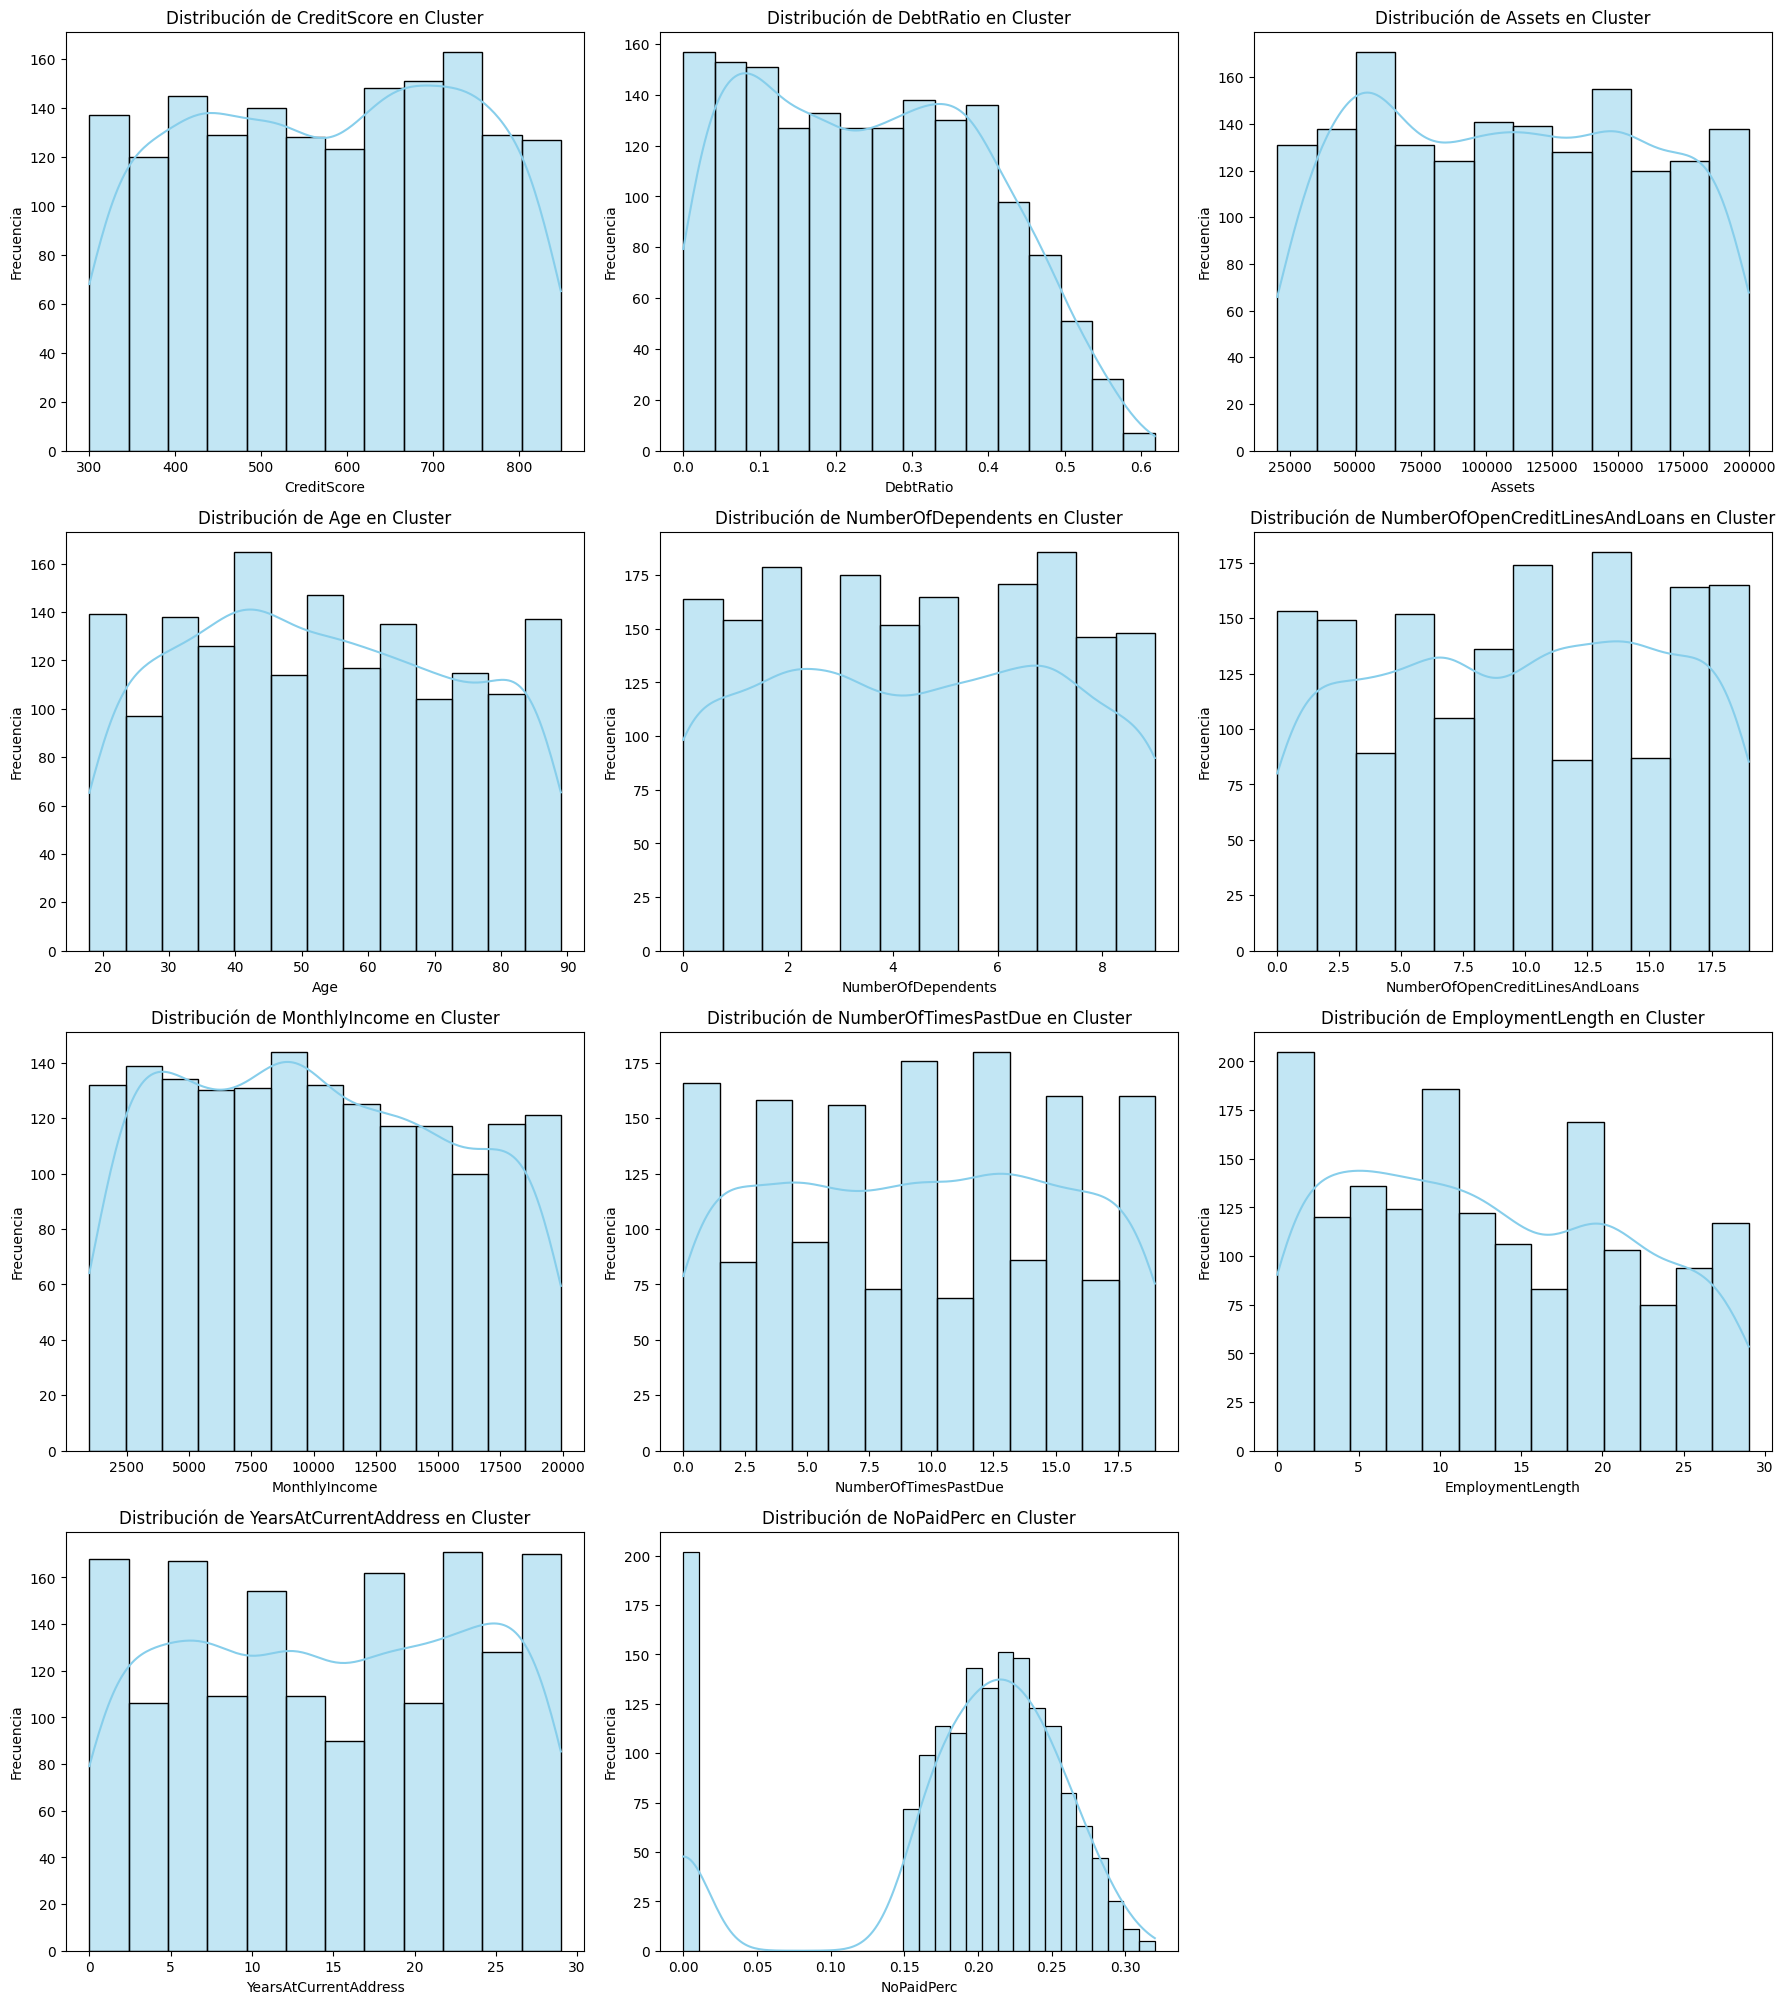

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calcular cuántas filas se necesitan
n = len(variables_a_graficar)
filas = math.ceil(n / 3)

fig, axes = plt.subplots(filas, 3, figsize=(18, 5 * filas))
axes = axes.flatten()  # Para iterar fácilmente

for i, var in enumerate(variables_a_graficar):
    sns.histplot(cluster[var], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de {var} en Cluster')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Ocultar ejes vacíos si hay menos de n celdas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-90-3029917262>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster, x=var, ax=axes[i], palette='Set2')
<ipython-input-90-3029917262>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster, x=var, ax=axes[i], palette='Set2')
<ipython-input-90-3029917262>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster, x=var, ax=axes[i], palette='Set2')


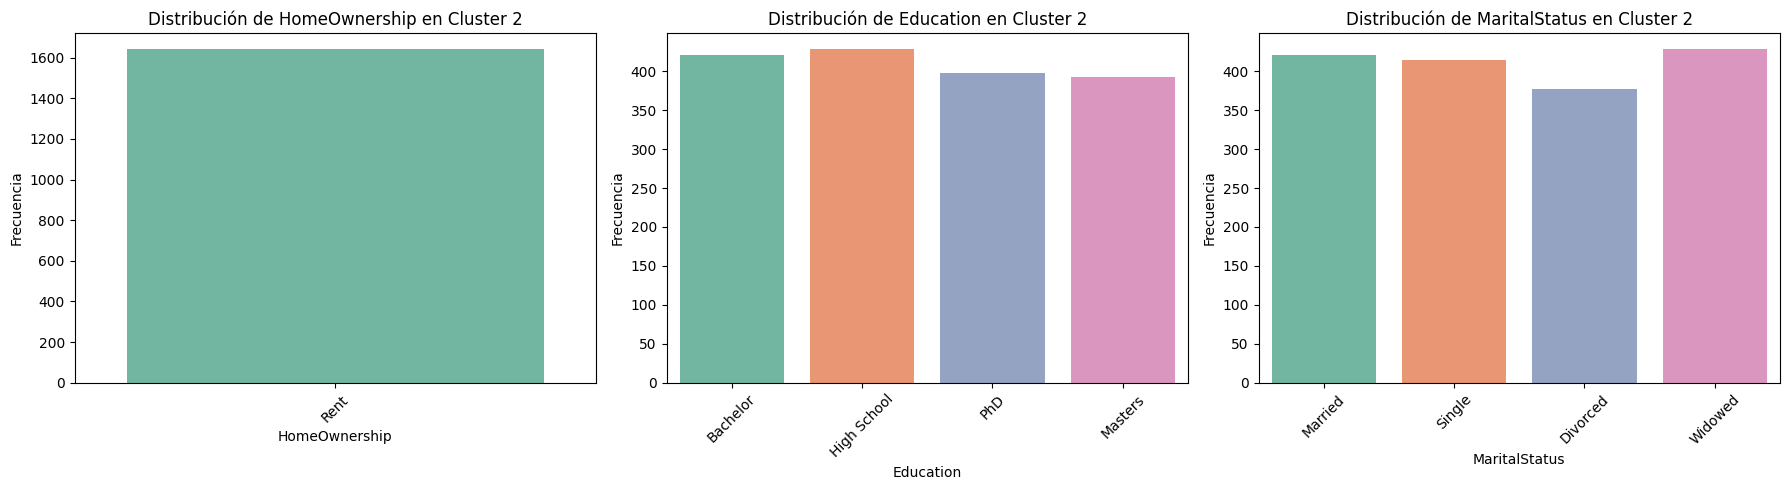

In [ ]:
# Seleccionar variables categóricas
categorical_vars = cluster.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular cuántas filas se necesitan
n = len(categorical_vars)
filas = math.ceil(n / 3)

fig, axes = plt.subplots(filas, 3, figsize=(18, 5 * filas))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(data=cluster, x=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribución de {var} en Cluster 2')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)  # Gira las etiquetas si son largas

# Ocultar ejes vacíos si hay menos de n celdas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# MODELO DE REGRESIÓN



In [13]:
## Data frame ya escalado
historicos_final.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,-1.216297,-1.678443,-1.384470,-1.608507,-1.573613,-1.300925,1.267823,-0.084786,1.552206,0.410933,...,False,False,True,False,False,False,True,False,False,False
1,-0.387213,-1.253694,-1.674010,-0.349417,0.173487,-0.253608,-0.600388,0.608899,-1.690920,-0.622399,...,False,True,True,False,False,False,False,True,False,False
2,0.379062,-0.377126,0.320526,1.297085,0.173487,-0.428161,-1.566609,-0.605049,1.204729,-0.622399,...,False,True,True,False,False,False,False,False,True,False
3,-1.348197,-0.125706,-1.353805,0.037995,1.571167,-1.650030,1.631923,-0.778471,0.857251,-1.311286,...,True,False,False,True,False,False,False,False,False,True
4,1.421699,0.017781,-1.373459,0.909673,-1.224193,0.095498,-0.462199,1.476006,0.509773,-1.081657,...,True,False,False,False,False,True,False,True,False,False


In [16]:
### Predecir NoPaidPerc
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir X e y
X = historicos_final
y = historicos['NoPaidPerc']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Modelo base XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=123)

# Grid Search para encontrar los mejores hiperparámetros
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                    scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Entrenar el modelo
grid.fit(X_train, y_train)

# Predicciones
y_pred = grid.best_estimator_.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mejor combinación de hiperparámetros:")
print(grid.best_params_)
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejor combinación de hiperparámetros:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}
R²: 0.8428
RMSE: 0.0258


In [14]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import keras_tuner as kt
import numpy as np

# Red neuronal base (ANN 1)
ann1 = keras.Sequential()

# Capa de entrada: Usamos Input(shape=) como primera capa
ann1.add(layers.Input(shape=(X_train.shape[1],)))  # Especifica la forma de entrada (numero columnas o variables)
ann1.add(layers.Dense(256, activation='relu'))  # Capa oculta 1
#ann1.add(keras.layers.Dropout(0.3))
ann1.add(layers.Dense(128, activation='relu'))  # Capa oculta 2
#ann1.add(keras.layers.Dropout(0.3))
ann1.add(layers.Dense(128, activation='relu'))    # Capa oculta 3
ann1.add(layers.Dense(32, activation='relu'))    # Capa oculta 4
ann1.add(layers.Dense(1, activation='linear'))  # Capa de salida

# Resumen de la arquitectura y parámetros totales
ann1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,201 (231.25 KB)

 Trainable params: 59,201 (231.25 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint ## guardar mejor modelo

# Compilar el modelo ANN para regresión
ann1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

## checkpoint
checkpoint1 = ModelCheckpoint(
    filepath='salidas/best_ann1.keras',
)


# Entrenamiento
history = ann1.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint1]
)



Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 2.4425e-05 - mae: 0.0038 - val_loss: 8.6238e-04 - val_mae: 0.0213
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.1568e-05 - mae: 0.0036 - val_loss: 8.7317e-04 - val_mae: 0.0213
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3930e-05 - mae: 0.0037 - val_loss: 8.6109e-04 - val_mae: 0.0212
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1557e-05 - mae: 0.0036 - val_loss: 8.6214e-04 - val_mae: 0.0213
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4332e-05 - mae: 0.0038 - val_loss: 8.6473e-04 - val_mae: 0.0213
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3229e-05 - mae: 0.0037 - val_loss: 8.6049e-04 - val_mae: 0.0212
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0747e-05 - mae: 0.0035 - val_loss: 8.6556e-04 - val_mae: 0.0214
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1855e-05 - mae: 0.0036 - val_loss: 8.5271e-04 - val_mae

In [37]:
# Predicciones
y_pred = ann1.predict(X_test).flatten()

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R²: 0.8068
RMSE: 0.0286


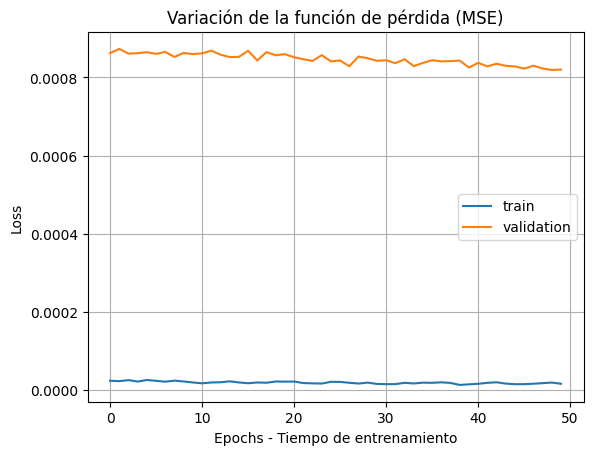

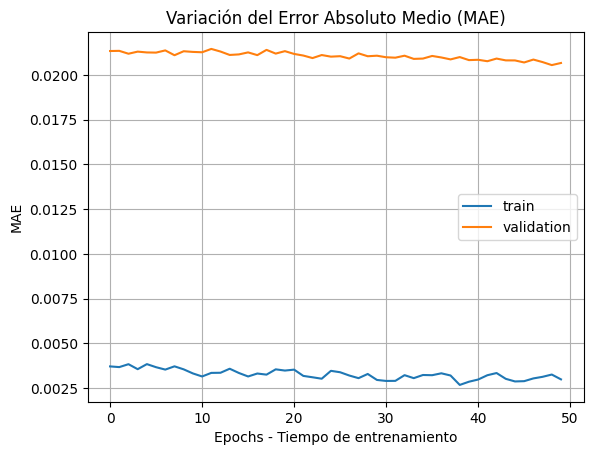

In [38]:
import matplotlib.pyplot as plt

# Visualización de la función de pérdida (MSE)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variación de la función de pérdida (MSE)')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.grid(True)
plt.show()

# Visualización de la MAE (Mean Absolute Error)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Variación del Error Absoluto Medio (MAE)')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('MAE')
plt.legend(['train', 'validation'])
plt.grid(True)
plt.show()


In [39]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import keras_tuner as kt
import numpy as np

# Red neuronal base (ANN 1)
ann2 = keras.Sequential()

# Capa de entrada: Usamos Input(shape=) como primera capa
ann2.add(layers.Input(shape=(X_train.shape[1],)))  # Especifica la forma de entrada (numero columnas o variables)
ann2.add(layers.Dense(256, activation='relu'))  # Capa oculta 1
ann2.add(keras.layers.Dropout(0.2))
ann2.add(layers.Dense(128, activation='relu'))  # Capa oculta 2
ann2.add(keras.layers.Dropout(0.2))
ann2.add(layers.Dense(128, activation='relu'))    # Capa oculta 3
ann2.add(layers.Dense(32, activation='relu'))    # Capa oculta 4
ann2.add(layers.Dense(1, activation='linear'))  # Capa de salida

# Resumen de la arquitectura y parámetros totales
ann2.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,201 (231.25 KB)

 Trainable params: 59,201 (231.25 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Compilar el modelo ANN para regresión
ann2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

checkpoint2 = ModelCheckpoint(
    filepath='/content/drive/MyDrive/cod/LEA3_FIN2/salidas/best_ann2.keras'
)

history2 = ann2.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint2],
    verbose=1
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0103 - mae: 0.0791 - val_loss: 0.0053 - val_mae: 0.0631
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0051 - mae: 0.0556 - val_loss: 0.0033 - val_mae: 0.0489
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0036 - mae: 0.0458 - val_loss: 0.0023 - val_mae: 0.0390
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - mae: 0.0414 - val_loss: 0.0018 - val_mae: 0.0344
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - mae: 0.0356 - val_loss: 0.0017 - val_mae: 0.0331
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0015 - val_mae: 0.0313
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mae: 0.0313 - val_loss: 0.0014 - val_mae: 0.0302
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

In [41]:
# Predicciones
y_pred = ann2.predict(X_test).flatten()

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R²: 0.8530
RMSE: 0.0250


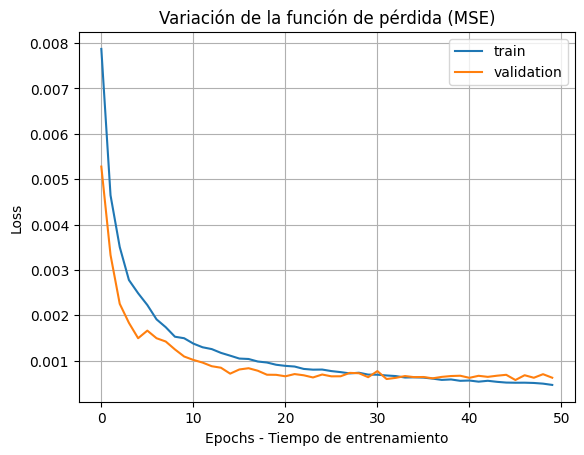

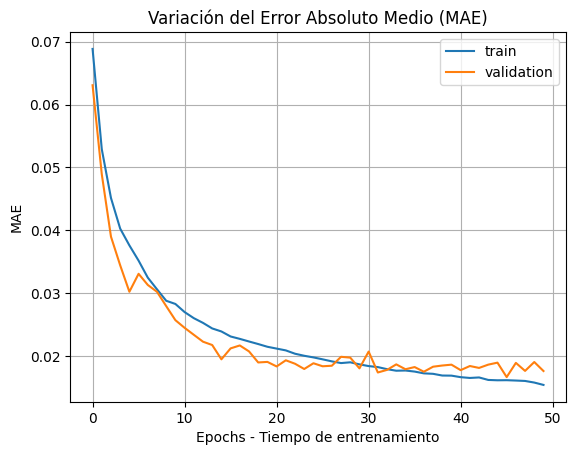

In [42]:
import matplotlib.pyplot as plt

# Visualización de la función de pérdida (MSE)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Variación de la función de pérdida (MSE)')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.grid(True)
plt.show()

# Visualización de la MAE (Mean Absolute Error)
plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.title('Variación del Error Absoluto Medio (MAE)')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('MAE')
plt.legend(['train', 'validation'])
plt.grid(True)
plt.show()


In [60]:
import shutil
shutil.rmtree('ann_tuner/nopaidperc', ignore_errors=True)

In [61]:

# 1. Dividir los datos
X = historicos_final
y = historicos['NoPaidPerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 2. Definir función de modelo
def build_model(hp):
    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Dense(
        units=hp.Int('units_input', min_value=64, max_value=256, step=32),
        activation=hp.Choice('act_input', ['relu', 'tanh']),
        input_shape=(X_train.shape[1],)
    ))

    # Dropout
    model.add(layers.Dropout(rate=hp.Float('dropout_0', min_value=0.1, max_value=0.5, step=0.1)))

    # Segunda capa
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=32),
        activation=hp.Choice('act_1', ['relu', 'tanh'])
    ))

    # Tercera capa
    model.add(layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation=hp.Choice('act_2', ['relu', 'tanh'])
    ))

    # Dropout
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Cuarta capa
    model.add(layers.Dense(
        units=hp.Int('units_3', min_value=32, max_value=128, step=32),
        activation=hp.Choice('act_3', ['relu', 'tanh'])
    ))

    # Capa de salida (regresión)
    model.add(layers.Dense(1, activation='linear'))

    # Compilación
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )

    return model

# 3. Inicializar el tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='ann_tuner',
    project_name='nopaidperc'
)

# 4. Buscar la mejor arquitectura
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.3,
             verbose=1)

# 5. Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# 6. Evaluación
y_pred = best_model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Trial 10 Complete [00h 03m 31s]
val_loss: 0.0007672033583124479

Best val_loss So Far: 0.00065117016977941
Total elapsed time: 00h 30m 41s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/63 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R²: 0.8563
RMSE: 0.0247


In [62]:
best_model.save('/content/drive/MyDrive/cod/LEA3_FIN2/salidas/mejor_modelo_regresion.keras')

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


df_pred = nuevos.copy()
ids = df_pred['ID']
new_loan_app = df_pred['NewLoanApplication']

# Eliminar columnas que no se usan en la predicción
df_pred = df_pred.drop(columns=['ID', 'NewLoanApplication'])

# columnas numéricas y categóricas
num_cols = df_pred.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_pred.select_dtypes(include='object').columns.tolist()

# Escalar numéricas (usa el mismo escalador del entrenamiento)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_pred[num_cols])

# One-hot
X_cat_encoded=pd.get_dummies(df_pred[cat_cols], columns=cat_cols, drop_first=False)

import numpy as np
X_final = np.hstack([X_num_scaled, X_cat_encoded])

#Predecir con el modelo
y_pred = best_model.predict(X_final).flatten()

# df final con predicciones
df_resultado = pd.DataFrame()
df_resultado['ID'] = ids.values
df_resultado = df_resultado.join(df_pred)  # Variables originales sin ID ni NewLoanApplication
df_resultado['NewLoanApplication'] = new_loan_app.values
df_resultado['Pred_NoPaidPerc'] = y_pred

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [46]:
df_resultado

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,Pred_NoPaidPerc
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0,0.176113
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0,0.188174
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0,0.149035
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0,0.178558
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0,0.061350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,11054,603,0.257370,179888,37,0,17,19788,8,1,Mortgage,High School,Widowed,23,356184.0,0.206859
1054,11055,710,0.690966,178287,48,6,8,13469,3,14,Rent,Bachelor,Widowed,14,282849.0,0.221737
1055,11056,642,0.099068,195318,45,5,19,15991,0,6,Own,PhD,Single,22,319820.0,0.217582
1056,11057,790,0.164651,109782,59,8,17,9726,7,17,Own,High School,Widowed,28,116712.0,0.151223


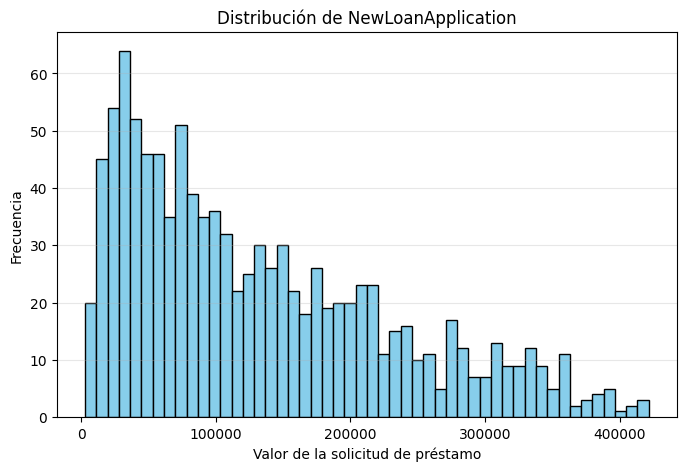

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_resultado['NewLoanApplication'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de NewLoanApplication')
plt.xlabel('Valor de la solicitud de préstamo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [48]:
df_resultado['NumberOfTimesPastDue'].describe()

,NumberOfTimesPastDue
count,1058.000000
mean,7.982042
std,5.489532
min,0.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,19.000000


In [52]:
(df_resultado['NewLoanApplication']<=50000).sum()

np.int64(264)

In [53]:
def obtener_peso_y_riesgo(fila):
    # Si la predicción es negativa o cero
    if fila['Pred_NoPaidPerc'] <= 0:
        pred = 0
        peso = 0
        riesgo_crediticio = 0.05
        return pd.Series([peso, riesgo_crediticio])

    # Predicción válida (> 0), aplicar reglas normales

    peso = 0.2  # Base de bajo riesgo

    if fila['CreditScore'] < 580: # El credit Score es malo
        peso += 0.2
    elif fila['CreditScore'] <= 670: # El credit Score es aceptable/regular
        peso += 0.1

    if fila['HomeOwnership'] in ['Rent', 'Mortgage']: # Si paga renta o hipoteca significa que tiene un egreso más
        peso += 0.05

    if fila['NumberOfDependents'] >= 5: # Si tiene más de 5 personas que dependen de el/ella
        peso += 0.05

    if fila['MonthlyIncome'] <= 5000:
        peso += 0.15
    elif fila['MonthlyIncome'] <= 10000:
        peso += 0.1
    elif fila['MonthlyIncome'] <= 15000:
        peso += 0.05

    if 5 <= fila['NumberOfTimesPastDue'] <= 10:
        peso += 0.05
    elif 11 <= fila['NumberOfTimesPastDue'] <= 15:
        peso += 0.1
    elif 16 <= fila['NumberOfTimesPastDue'] <= 19:
        peso += 0.2

    if fila['EmploymentLength'] <= 1:
        peso += 0.05
    if fila['EmploymentLength'] < 2:
        peso += 0.05

    riesgo_crediticio = (fila['Pred_NoPaidPerc'] * peso) + 0.05
    return pd.Series([peso, riesgo_crediticio])

In [54]:
df_resultado[['PesoRiesgo', 'RiesgoCrediticio']] = df_resultado.apply(obtener_peso_y_riesgo, axis=1)

In [55]:
df_resultado

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,Pred_NoPaidPerc,PesoRiesgo,RiesgoCrediticio
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0,0.176113,0.50,0.138057
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0,0.188174,0.60,0.162905
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0,0.149035,0.35,0.102162
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0,0.178558,0.60,0.157135
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0,0.061350,0.65,0.089878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,11054,603,0.257370,179888,37,0,17,19788,8,1,Mortgage,High School,Widowed,23,356184.0,0.206859,0.50,0.153429
1054,11055,710,0.690966,178287,48,6,8,13469,3,14,Rent,Bachelor,Widowed,14,282849.0,0.221737,0.35,0.127608
1055,11056,642,0.099068,195318,45,5,19,15991,0,6,Own,PhD,Single,22,319820.0,0.217582,0.35,0.126154
1056,11057,790,0.164651,109782,59,8,17,9726,7,17,Own,High School,Widowed,28,116712.0,0.151223,0.40,0.110489


In [ ]:
df_resultado['RiesgoCrediticio'].describe()

,RiesgoCrediticio
count,1058.000000
mean,0.165484
std,0.054430
min,0.050000
25%,0.132830
50%,0.170904
75%,0.205454
max,0.281222


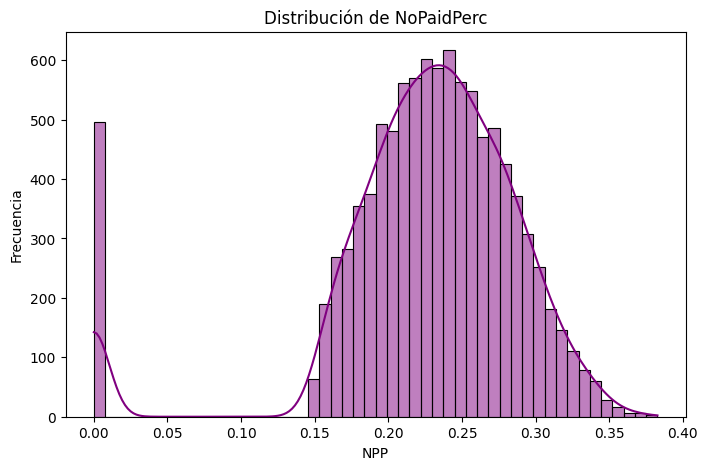

In [ ]:
# Distribución de la Proporción de los pagos que los consumidores no han realizado en todos sus créditos
plt.figure(figsize=(8, 5))
sns.histplot(historicos['NoPaidPerc'], kde=True, bins=50, color='purple')
plt.title('Distribución de NoPaidPerc')
plt.xlabel('NPP')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Maximo= historicos['NoPaidPerc'].max()
print('El valor maximo de porcentaje no pagado por un usuario de banca fue historicamente de : ',Maximo)
Minimo= historicos['NoPaidPerc'].min()
print('El valor minimo de porcentaje no pagado por un usuario de banca fue historicamente de : ',Minimo)

El valor maximo de porcentaje no pagado por un usuario de banca fue historicamente de :  0.38279152
El valor minimo de porcentaje no pagado por un usuario de banca fue historicamente de :  0.0


In [ ]:
historicos['NoPaidPerc'].describe()

,NoPaidPerc
count,10000.000000
mean,0.226052
std,0.067179
min,0.000000
25%,0.198827
50%,0.233158
75%,0.267660
max,0.382792


In [ ]:
# Valores únicos
print(historicos['NoPaidPerc'].unique())

[0.19656637 0.2644376  0.28756785 ... 0.2379866  0.18039401 0.24172479]


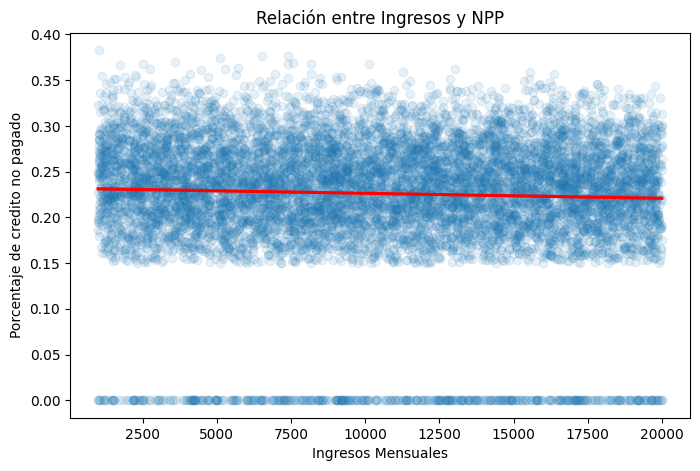

In [ ]:
# NPP vs Ingresos
plt.figure(figsize=(8, 5))
sns.regplot(x='MonthlyIncome', y='NoPaidPerc', data=historicos, scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title('Relación entre Ingresos y NPP')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Porcentaje de credito no pagado')
plt.show()


In [ ]:
promedio= historicos['NoPaidPerc'].mean()
print('El promedio de porcentaje no pagado por un usuario de banca fue historicamente de : ',promedio)

El promedio de porcentaje no pagado por un usuario de banca fue historicamente de :  0.22605195131300002


## Analisís
Adicionalmente, vemos que hay varios niveles que es el pago total de los créditos, el primero son l clientes con un NoPaidPerc de 0 y luego estan los clientes entre el 15% de NoPaidPerc hasta cerca del 40%.

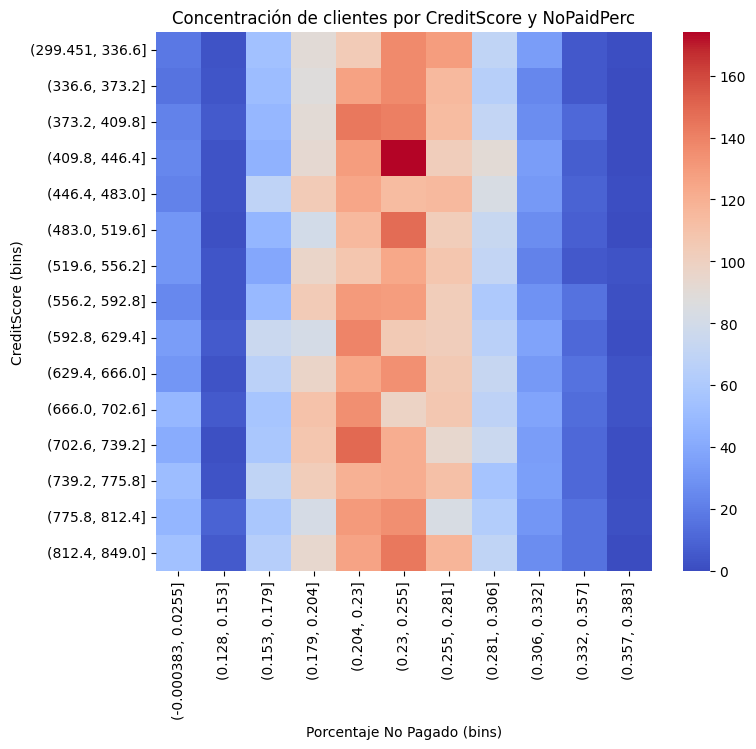

In [ ]:
credit_bins = pd.cut(historicos['CreditScore'], bins=15)
nopaid_bins = pd.cut(historicos['NoPaidPerc'], bins=15)

heatmap_data = pd.crosstab(credit_bins, nopaid_bins)

plt.figure(figsize=(8,7))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Concentración de clientes por CreditScore y NoPaidPerc')
plt.xlabel('Porcentaje No Pagado (bins)')
plt.ylabel('CreditScore (bins)')
plt.show()

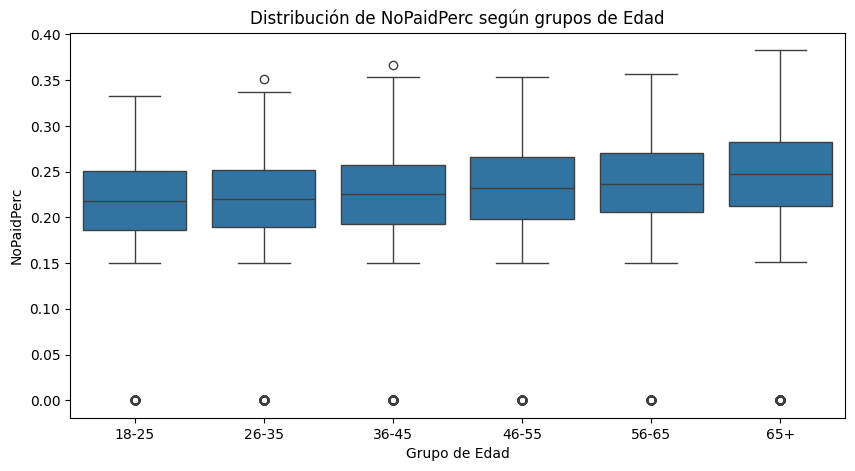

In [ ]:

# Agrupar Age en rangos y analizar con boxplot
historicos['AgeGroup'] = pd.cut(historicos['Age'], bins=[18,25,35,45,55,65,100], labels=['18-25','26-35','36-45','46-55','56-65','65+'])

plt.figure(figsize=(10,5))
sns.boxplot(x='AgeGroup', y='NoPaidPerc', data=historicos)
plt.title('Distribución de NoPaidPerc según grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('NoPaidPerc')
plt.show()


In [ ]:
print(historicos.groupby("AgeGroup")["NoPaidPerc"].describe())


           count      mean       std  min       25%       50%       75%  \
AgeGroup                                                                  
18-25      961.0  0.209090  0.066453  0.0  0.186115  0.217644  0.250646   
26-35     1410.0  0.211598  0.067154  0.0  0.189457  0.220282  0.251456   
36-45     1472.0  0.217606  0.066184  0.0  0.192434  0.225690  0.257111   
46-55     1371.0  0.223034  0.069122  0.0  0.198176  0.232642  0.266326   
56-65     1390.0  0.230956  0.062821  0.0  0.205933  0.236082  0.270721   
65+       3267.0  0.240940  0.065150  0.0  0.212535  0.247072  0.282544   

               max  
AgeGroup            
18-25     0.332969  
26-35     0.351850  
36-45     0.366159  
46-55     0.353835  
56-65     0.357123  
65+       0.382792  


<ipython-input-20-5c2d89ded05c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(historicos.groupby("AgeGroup")["NoPaidPerc"].describe())


In [ ]:
correlation = historicos["Age"].corr(historicos["NoPaidPerc"])
print(f"Correlación entre edad y porcentaje de impago: {correlation:.2f}")


Correlación entre edad y porcentaje de impago: 0.18


<ipython-input-24-8aef86368bc2>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_impago = historicos.groupby("AgeGroup")["NoPaidPerc"].mean()


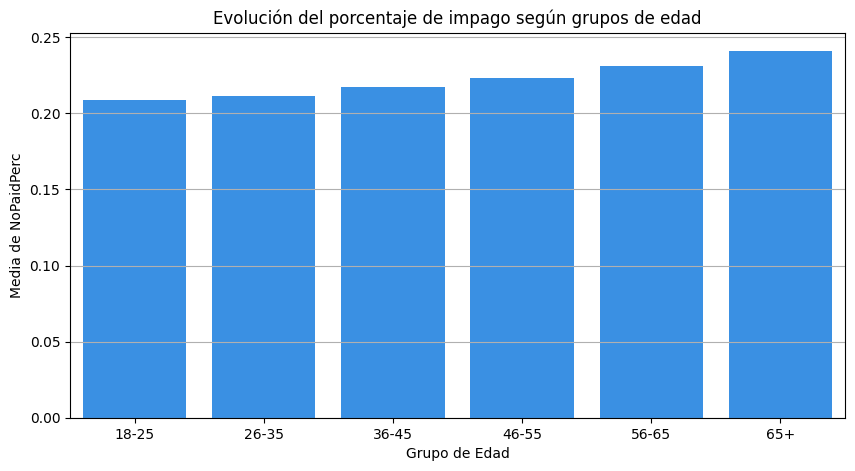

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_impago = historicos.groupby("AgeGroup")["NoPaidPerc"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=mean_impago.index, y=mean_impago.values, color='dodgerblue')
plt.xlabel("Grupo de Edad")
plt.ylabel("Media de NoPaidPerc")
plt.title("Evolución del porcentaje de impago según grupos de edad")
plt.grid(axis='y')
plt.show()

In [ ]:
# Calcular los cuartiles y el IQR por grupo de edad
q1 = historicos.groupby("AgeGroup", observed=False)["NoPaidPerc"].quantile(0.25)
q3 = historicos.groupby("AgeGroup", observed=False)["NoPaidPerc"].quantile(0.75)
iqr = q3 - q1

# Definir los límites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Contar los outliers por grupo de edad
# Contar los outliers por grupo de edad
outliers_count = (historicos.groupby("AgeGroup", observed=False)
                  .apply(lambda x: ((x["NoPaidPerc"] < lower_bound[x.name]) |
                                    (x["NoPaidPerc"] > upper_bound[x.name])).sum()))

# Mostrar el número de datos atípicos por grupo de edad
print(outliers_count)

AgeGroup
18-25     61
26-35     90
36-45     82
46-55     79
56-65     54
65+      121
dtype: int64


<ipython-input-33-8036c4553392>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: ((x["NoPaidPerc"] < lower_bound[x.name]) |


In [ ]:
# Contar el total de registros por grupo de edad
total_por_grupo = historicos.groupby("AgeGroup")["NoPaidPerc"].count()

#  porcentaje de outliers por grupo de edad
porcentaje_outliers_por_grupo = (outliers_count / total_por_grupo) * 100
print(porcentaje_outliers_por_grupo)


AgeGroup
18-25    6.347555
26-35    6.382979
36-45    5.570652
46-55    5.762217
56-65    3.884892
65+      3.703704
dtype: float64


<ipython-input-18-590c490486e2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_grupo = Historicos.groupby("AgeGroup")["NoPaidPerc"].count()


A mayor nivel de endeudamiento mayor es la tasa de impago

In [ ]:


# Lista de variables numéricas
numeric_vars = historicos.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar la cantidad de gráficos por fila
num_graficos = len(numeric_vars)
columnas = 2  # Número de columnas en el gráfico
filas = num_graficos // columnas + (num_graficos % columnas > 0)  # Calcula filas necesarias

# Iterar por bloques de 4 variables
for i in range(0, num_graficos, 6):
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Crear una matriz de gráficos

    for j, ax in enumerate(axes.flatten()):
        if i + j < num_graficos:  # Verificar que no exceda la lista de variables
            var = numeric_vars[i + j]
            sns.regplot(x=historicos[var], y=historicos['NoPaidPerc'],
                        scatter_kws={'alpha': 0.1}, line_kws={"color": "red"}, ax=ax)
            ax.set_title(f'Relación entre {var} y NoPaidPerc')
            ax.set_xlabel(var)
            ax.set_ylabel('Porcentaje de crédito no pagado')

    plt.tight_layout()  # Ajustar espaciado entre gráficos
    plt.show()


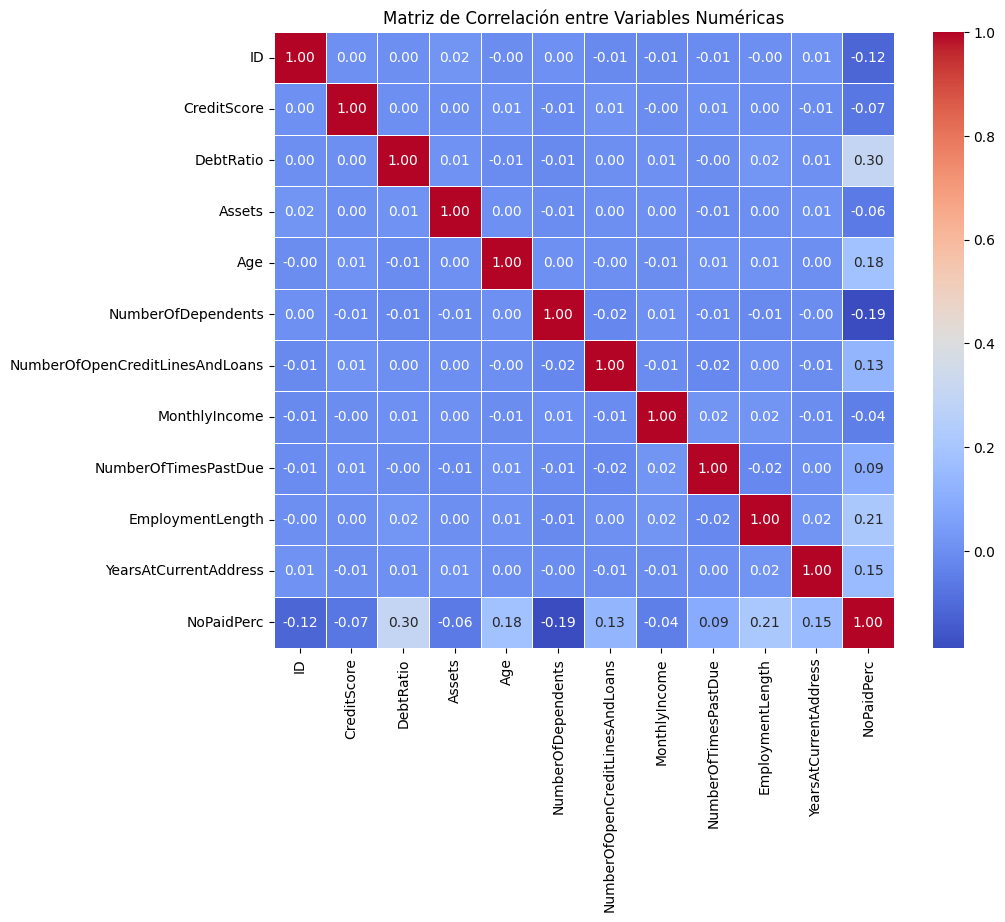

In [ ]:



# Calcular la matriz de correlación
correlation_matrix = historicos[numeric_vars].corr()


# Visualización con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

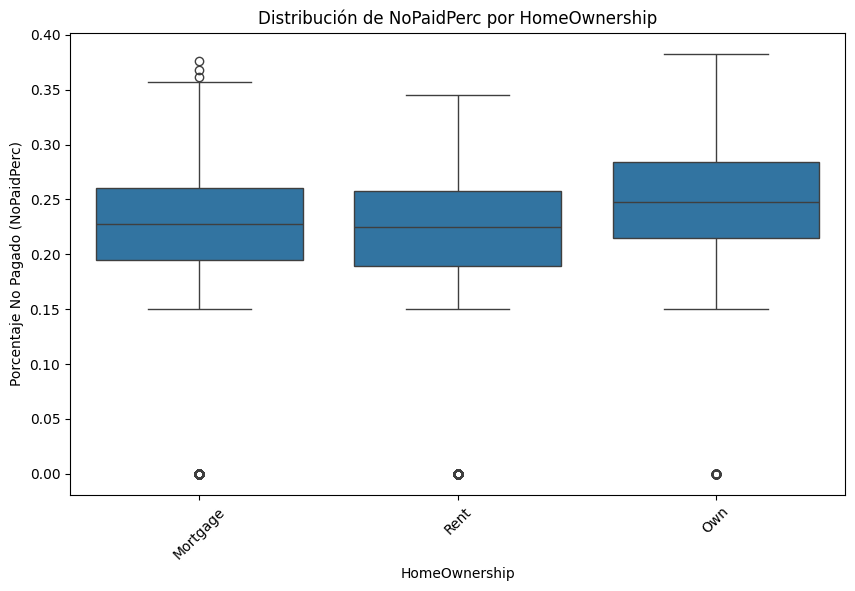

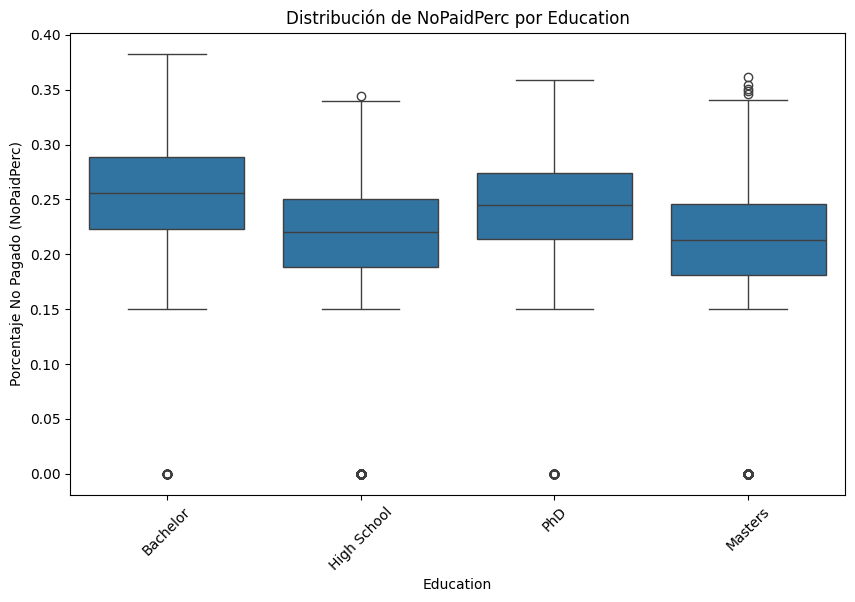

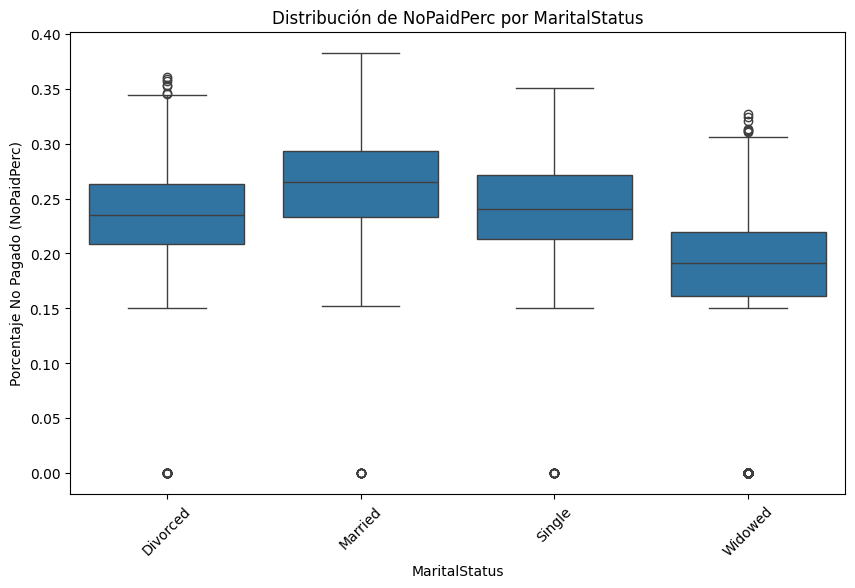

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars= historicos.select_dtypes(include=['object', 'category']).columns.tolist()

for var in categorical_vars:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=var, y='NoPaidPerc', data=historicos)
    plt.title(f'Distribución de NoPaidPerc por {var}')
    plt.xlabel(var)
    plt.ylabel('Porcentaje No Pagado (NoPaidPerc)')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
historicos.groupby('MaritalStatus')['NoPaidPerc'].mean().sort_values()

,NoPaidPerc
MaritalStatus,
Widowed,0.168639
Divorced,0.234771
Single,0.241019
Married,0.262579


# Para categoricas

In [ ]:
import scipy.stats as stats

for cat in categorical_vars:
    grupos = [historicos[historicos[cat] == valor]["NoPaidPerc"] for valor in historicos[cat].unique()]
    anova_result = stats.f_oneway(*grupos)
    print(f"Variable: {cat}")
    print(f"F: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}\n")

Variable: HomeOwnership
F: 246.8933, p-value: 0.0000

Variable: Education
F: 371.6045, p-value: 0.0000

Variable: MaritalStatus
F: 1267.3359, p-value: 0.0000



# ANALISIS:
Se puede apreciar que los usuarios que no estan casados, tienen una tasa de no pago promedio inferior a los que si se encuentran casados

Para aquellos que cuentan casa propia se ve un aumento en el NPPerc, se puede asumir un prestamo a largo plazo y que aun no han pagado la totalidad del prestamo.

No hay un relación clara con la cantidad de credito no pagada con el nivel de formación academica.

en resumen de las variables categoricas la que tiene mayor influencia lo que sugiere que el estado civil del cliente es un fuerte predictor del riesgo de impago


In [ ]:
print(historicos_final.head())
print(historicos_final.columns)

       ID  CreditScore  DebtRatio    Assets       Age  NumberOfDependents  \
0 -1.0000    -0.706093  -0.985874 -0.811714 -0.936170                -1.0   
1 -0.9998    -0.232975  -0.737417 -0.979684 -0.198582                 0.0   
2 -0.9996     0.204301  -0.224666  0.177401  0.765957                 0.0   
3 -0.9994    -0.781362  -0.077598 -0.793924  0.028369                 0.8   
4 -0.9992     0.799283   0.006335 -0.805326  0.539007                -0.8   

   NumberOfOpenCreditLinesAndLoans  MonthlyIncome  NumberOfTimesPastDue  \
0                             -0.7       0.736688                  -0.1   
1                             -0.1      -0.345801                   0.3   
2                             -0.2      -0.905654                  -0.4   
3                             -0.9       0.947657                  -0.5   
4                              0.1      -0.265731                   0.8   

   EmploymentLength  ...  HomeOwnership_Own  HomeOwnership_Rent  \
0          0.866667

In [ ]:
X.shape

(10000, 18)

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split

# Asegúrate que X e y tengan el mismo número de filas
X = historicos_final.drop(columns=['ID', 'NoPaidPerc'])
y = historicos_final['NoPaidPerc']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(7000, 18)
(7000, 2)


In [ ]:
# Inicializar y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

In [ ]:
# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")  # Error absoluto medio
print(f"RMSE: {rmse:.4f}")  # Error cuadrático medio
print(f"R²: {r2:.4f}")  # Coeficiente de determinación

MAE: 0.2090
RMSE: 0.3923
R²: 0.6734


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


MAE: 0.1727
RMSE: 0.3398
R²: 0.7549


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(random_state=42)
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

print(f"R² promedio: {scores.mean():.4f}")
print(f"R² por fold: {scores}")

R² promedio: 0.7455
R² por fold: [0.73788047 0.76804772 0.76145738 0.75058555 0.70948608]


# Afinamiento de Hiper

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint

# Separar variables predictoras y objetivo
X = historicos_final.drop(columns='NoPaidPerc')
y = historicos_final['NoPaidPerc']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Entrenar
random_search.fit(X_train, y_train)

# Mejor modelo
best_model = random_search.best_estimator_

# Predicción
y_pred = best_model.predict(X_test)

# Métricas
print("Mejores parámetros:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Mejores parámetros: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 271}
MAE: 0.17345688776076013
RMSE: 0.35817030377562215
R²: 0.731507670596028


In [ ]:
# Métricas
print("Mejores parámetros:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Mejores parámetros: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 271}
MAE: 0.17345688776076013
RMSE: 0.35817030377562215
R²: 0.731507670596028
